# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. The start with the the root which is the top and then the data gets split into branches, depending on the chosen features.
2. Trees handle it by dividing the data into simpler groups. Instead of trying to fit it on a straight line like a linear model.
3. The gini fucniton meassures how different, pure a classes are in a node. This makes it good because it can figure out which classes to split for the most efficient way.
4. Trees can normally keep on splitting till every class is perfectly classified, which most likley also caputres noise. We can set limits for maximal tree depth to avoid this.
5. I think tihs is false, because they should work for both because the split the data based on any features.
6. Because it makes it easier to compute and easier to interpret the tree
7. You can look at how deep the tree is, if it is really deep and has a lot of branches it is most likley overfitting but if it is shallow with only a few branches it is most likley under fitted

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [1]:
import pandas as pd
df = pd.read_csv('/content/cars_hw.csv')
print(df.shape)
print(df.columns)
print(df.head())

(976, 12)
Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    pe

In [2]:
cat_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df_dummies = pd.get_dummies(df, columns=cat_vars, drop_first=True)

In [16]:
target = 'Price'
X = df_dummies.drop(columns=[target])
y = df_dummies[target]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [18]:
X_train_const = sm.add_constant(X_train)
X_test_const  = sm.add_constant(X_test)

In [19]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

best_r2 = -999
best_leaf = None
r2_scores = {}

for min_leaf in range(1, 26):
    tree_model = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=22)
    tree_model.fit(X_train, y_train)
    preds = tree_model.predict(X_test)
    score = r2_score(y_test, preds)
    r2_scores[min_leaf] = score
    if score > best_r2:
        best_r2 = score
        best_leaf = min_leaf

print("Best min_samples_leaf:", best_leaf)
print("Highest R² on test set:", best_r2)

Best min_samples_leaf: 14
Highest R² on test set: 0.7975541596974896


In [20]:
optimal_tree = DecisionTreeRegressor(min_samples_leaf=14, random_state=22)
optimal_tree.fit(X_train, y_train)
y_pred_tree = optimal_tree.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

test_r2 = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print("Optimal tree test R²:", test_r2)
print("Optimal tree test RMSE:", rmse_tree)


Optimal tree test R²: 0.7975541596974896
Optimal tree test RMSE: 159657.14358724465


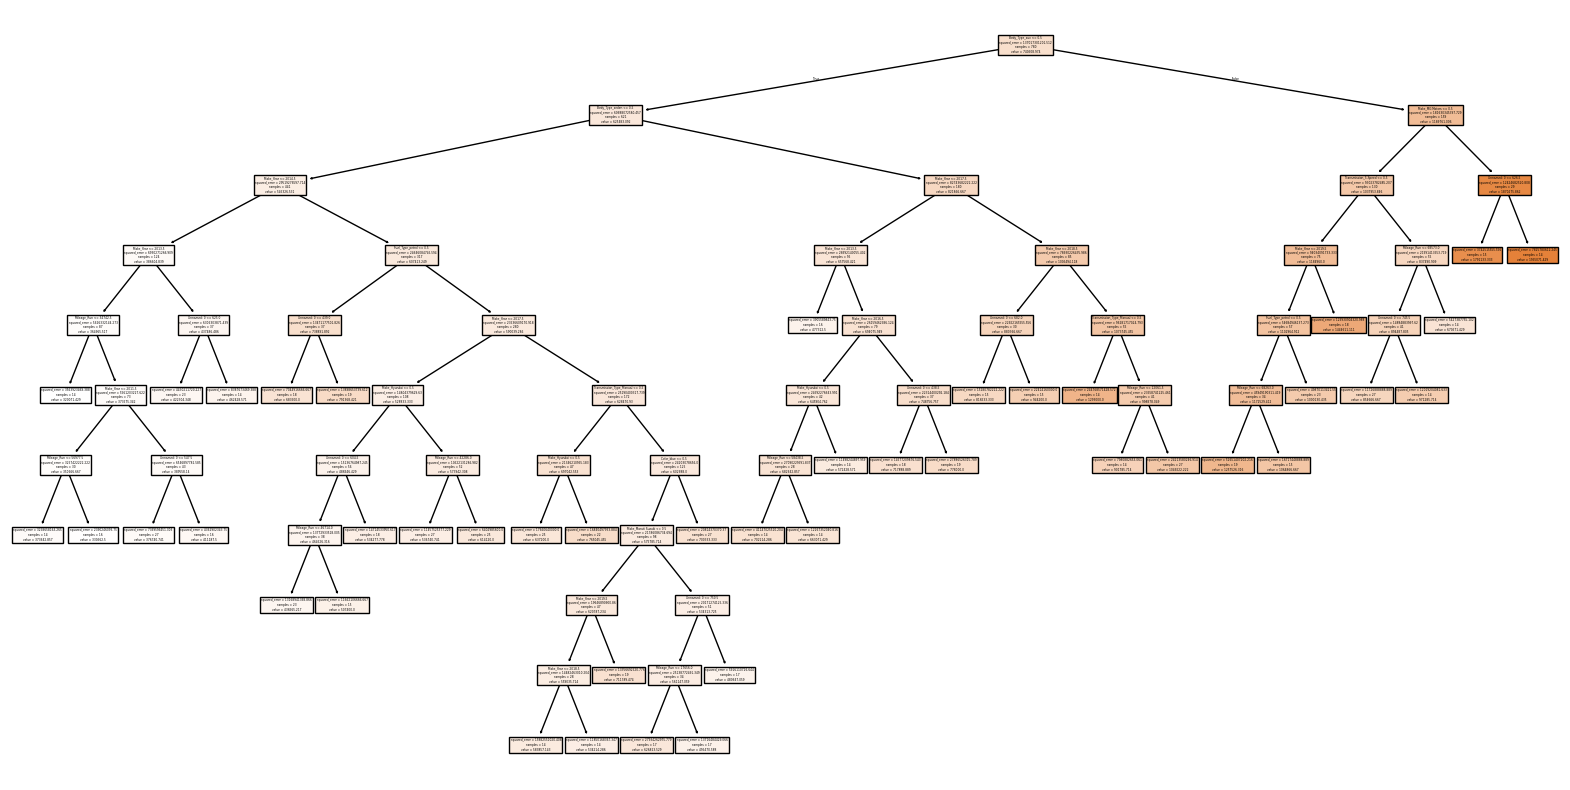

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(optimal_tree, feature_names=X_train.columns, filled=True)
plt.show()


In [26]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

from sklearn.metrics import r2_score
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))

Linear Regression R²: 0.8209628894742242


It looks like that the linear regresission model does a better job at predicting the price vairbale.

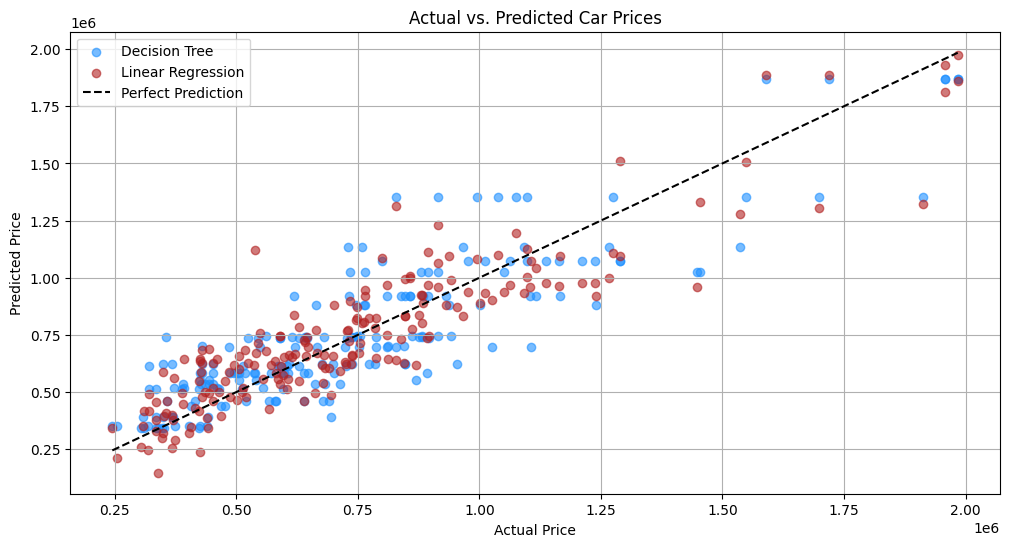

In [28]:
tree_preds = tree_model.predict(X_test)


lin_preds = linreg.predict(X_test)


plt.figure(figsize=(12, 6))
plt.scatter(y_test, tree_preds, alpha=0.6, label='Decision Tree', color='dodgerblue')
plt.scatter(y_test, lin_preds, alpha=0.6, label='Linear Regression', color='firebrick')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()
plt.grid(True)
plt.show()

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [29]:
import pandas as pd
df = pd.read_csv('/content/Breast Cancer METABRIC.csv')
print(df.shape)
print(df.columns)
print(df.head())

(2509, 34)
Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastect

In [35]:
needed_cols = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis',
               'Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed', 'Overall Survival Status']

df_clean = df[needed_cols].dropna()

num_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']

cat_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

X_cat = pd.get_dummies(df_clean[cat_vars], drop_first=True)
X_num = df_clean[num_vars]

X = pd.concat([X_num, X_cat], axis=1)
y = df_clean['Overall Survival Status']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=22)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=22)

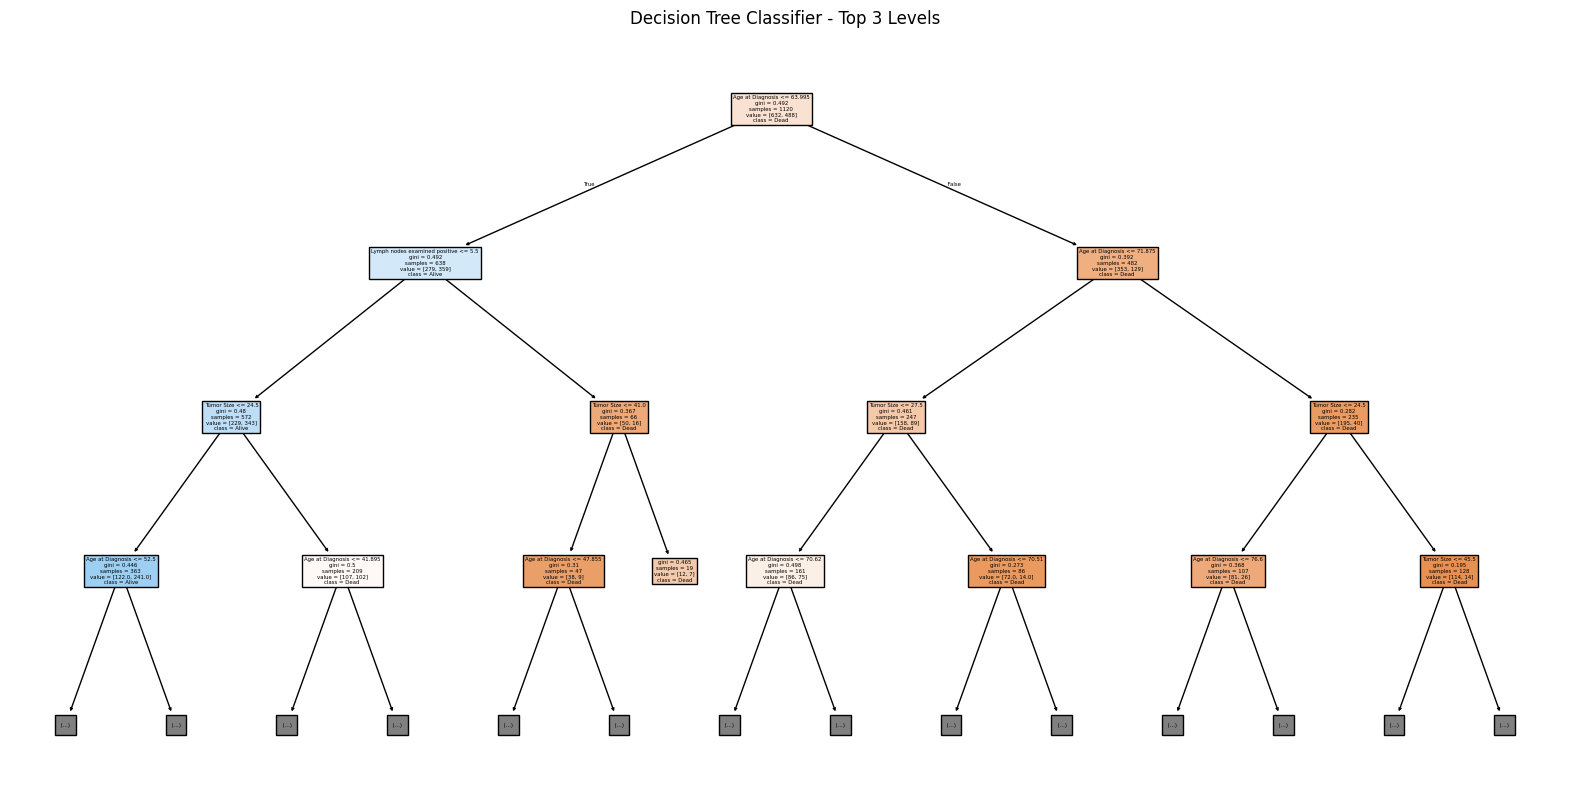

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Dead', 'Alive'], filled=True, max_depth=3)
plt.title("Decision Tree Classifier - Top 3 Levels")
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

Confusion Matrix:
 [[112  46]
 [ 56  66]]
Accuracy: 0.6357


In [45]:
TPR = 66/(66+56)
print(TPR)
TNR = 112/(112+46)
print(TNR)

0.5409836065573771
0.7088607594936709


It looks like the model performs better with the True negative rate, therefore the model is better at identifying pateins who did not surivve than patients who did.

In [49]:
num_vars = [
    'Age at Diagnosis', 'Lymph nodes examined positive',
    'Tumor Size', 'Mutation Count', 'Nottingham prognostic index'
]

cat_vars = [
    'Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed',
    'ER Status', 'HER2 Status', 'Hormone Therapy',
    'Radio Therapy', 'Inferred Menopausal State'
]

target = 'Overall Survival (Months)'

needed = num_vars + cat_vars + [target]
df_clean = df[needed].dropna()

In [51]:
X_cat = pd.get_dummies(df_clean[cat_vars], drop_first=True)
X_num = df_clean[num_vars]
X = pd.concat([X_num, X_cat], axis=1)
y = df_clean[target]

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22)

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

best_r2 = -float('inf')
best_leaf = None
r2_scores = {}

for min_leaf in range(1, 111):
    reg = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=42)
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    score = r2_score(y_test, preds)
    r2_scores[min_leaf] = score

    if score > best_r2:
        best_r2 = score
        best_leaf = min_leaf

print("Best min_samples_leaf:", best_leaf)
print("Highest R² on test set:", round(best_r2, 4))

Best min_samples_leaf: 43
Highest R² on test set: 0.0944


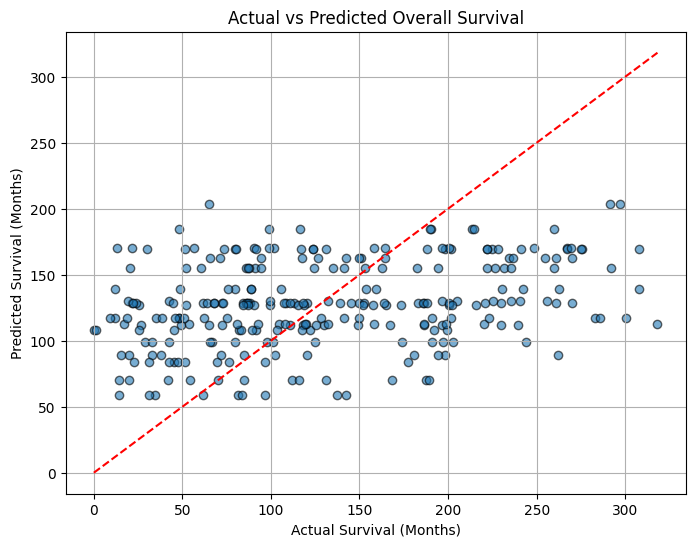

In [54]:
import matplotlib.pyplot as plt

best_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Actual vs Predicted Overall Survival")
plt.grid(True)
plt.show()

it looks like that the model perfroms really poorly, it barely is better than guessing... I don't feel strong about the model at all because it doesn't work well

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?